First of all pyAPEP should be installed to your virtual environment or the python system. In your terminal, type the following code to install the pyapep package before runn the following code. 
```
pip install pyapep
pip install numpy
pip install matplotlib
pip install scikit-learn
```

In [ ]:
%pip install pyapep numpy matplotlib scikit-learn


[N2] Fitting with SIPS model 
  Model type: Sips
  Parameters (qm, K, n): [0.9396061577088524 0.0015473363302743479 1.1270546629085432]
  Heat of adsorption: 15220.3 J/mol
  Fit error: 0.000010

[CO2] Fitting with SIPS model 
  Model type: Sips
  Parameters (qm, K, n): [10.88979501486422 0.004242254024835562 0.9690403405300325]
  Heat of adsorption: 23473.2 J/mol
  Fit error: 0.000044

SIPS PARAMETERS FOR PYOMO

[N2]
  n_inf = 0.9396 mol/kg
  b_ref = 1.5473e-06 Pa^-1
  c (heterogeneity) = 1.12705
  Q_b = 15220.3 J/mol

[CO2]
  n_inf = 10.8898 mol/kg
  b_ref = 4.2423e-06 Pa^-1
  c (heterogeneity) = 0.96904
  Q_b = 23473.2 J/mol

VALIDATION METRICS

[N2 Sips] R² = 0.9970, RMSE = 0.004837
[CO2 Sips] R² = 0.9997, RMSE = 0.021859

GENERATING PLOTS
  Saved: Sips_Isotherm_Fit.png


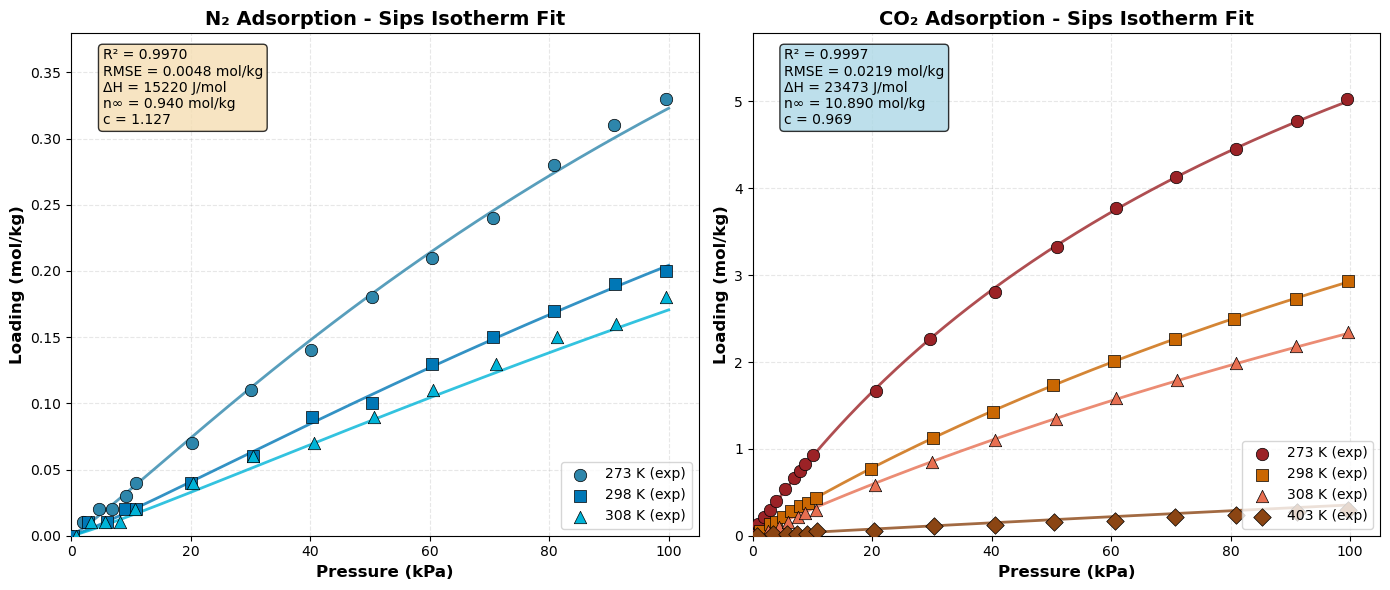

  Saved: Sips_Parity_Plot.png


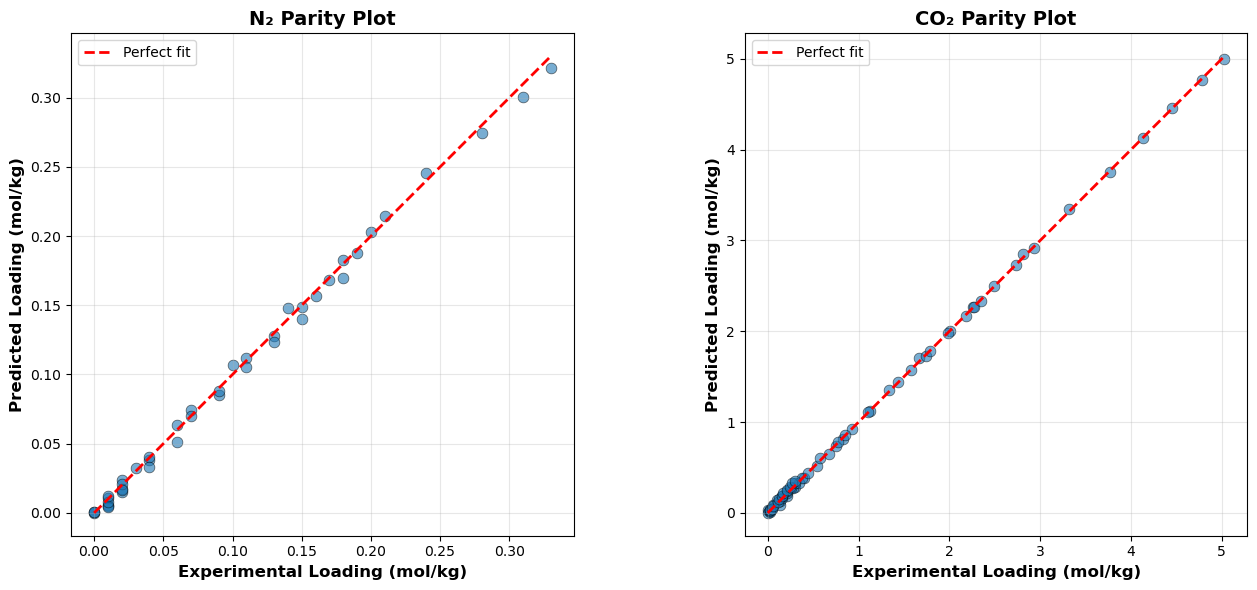


PLOTTING COMPLETE


In [3]:
import numpy as np
import pyapep.isofit as isofit
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Data
N2_P_298K = np.array([0.35, 2.83, 6.02, 9.03, 10.80, 20.00, 30.44, 40.35, 50.27, 60.35, 70.62, 80.88, 90.97, 99.47])
N2_q_298K = np.array([0.00, 0.01, 0.01, 0.02, 0.02, 0.04, 0.06, 0.09, 0.10, 0.13, 0.15, 0.17, 0.19, 0.20])

CO2_P_298K = np.array([1.18, 2.86, 3.87, 5.04, 6.39, 7.90, 9.24, 10.59, 19.83, 30.25, 40.17, 50.25, 60.50, 70.76, 80.50, 90.92, 99.66])
CO2_q_298K = np.array([0.05, 0.13, 0.16, 0.21, 0.28, 0.34, 0.38, 0.44, 0.77, 1.13, 1.43, 1.74, 2.01, 2.27, 2.49, 2.73, 2.93])

N2_P_273K = np.array([0.00, 1.95, 4.60, 6.90, 9.20, 10.80, 20.18, 30.09, 40.16, 50.27, 60.35, 70.62, 80.88, 90.80, 99.47])
N2_q_273K = np.array([0.00, 0.01, 0.02, 0.02, 0.03, 0.04, 0.07, 0.11, 0.14, 0.18, 0.21, 0.24, 0.28, 0.31, 0.33])
N2_P_308K = np.array([0.71, 3.36, 5.66, 8.14, 10.62, 20.35, 30.44, 40.71, 50.62, 60.53, 71.15, 81.24, 91.15, 99.47])
N2_q_308K = np.array([0.00, 0.01, 0.01, 0.01, 0.02, 0.04, 0.06, 0.07, 0.09, 0.11, 0.13, 0.15, 0.16, 0.18])

CO2_P_273K = np.array([0.17, 0.84, 1.85, 2.86, 3.87, 5.38, 6.89, 7.90, 8.74, 10.08, 20.67, 29.75, 40.50, 50.92, 60.84, 70.92, 80.84, 91.09, 99.50])
CO2_q_273K = np.array([0.01, 0.13, 0.21, 0.30, 0.40, 0.54, 0.67, 0.75, 0.83, 0.93, 1.67, 2.26, 2.81, 3.32, 3.77, 4.13, 4.45, 4.78, 5.03])
CO2_P_308K = np.array([0.84, 2.52, 4.37, 5.88, 7.56, 8.74, 10.59, 20.50, 30.08, 40.50, 50.76, 60.84, 71.09, 80.84, 90.92, 99.66])
CO2_q_308K = np.array([0.00, 0.06, 0.10, 0.16, 0.21, 0.26, 0.30, 0.58, 0.85, 1.10, 1.34, 1.58, 1.79, 1.99, 2.18, 2.35])
CO2_P_403K = np.array([0.67, 3.36, 5.71, 7.39, 9.08, 10.76, 20.34, 30.42, 40.50, 50.42, 60.67, 70.76, 80.84, 91.09, 99.66])
CO2_q_403K = np.array([0.00, 0.02, 0.02, 0.02, 0.02, 0.05, 0.06, 0.11, 0.12, 0.16, 0.17, 0.21, 0.24, 0.27, 0.30])

# Sips model only
from pyapep.isofit import Sips

iso_fun_lists_sips = [[Sips]]
iso_fun_index_sips = [['Sips']]
iso_par_nums_sips = [3]

print("\n[N2] Fitting with SIPS model ")
P_list_N2 = [N2_P_273K, N2_P_298K, N2_P_308K]
q_list_N2 = [N2_q_273K, N2_q_298K, N2_q_308K]
T_list_N2 = [273, 298, 308]

res_N2_sips = isofit.fit_diffT(
    P_list_N2, q_list_N2, T_list_N2, 
    i_ref=1,
    iso_par_nums=iso_par_nums_sips,
    iso_fun_lists=iso_fun_lists_sips,
    iso_fun_index=iso_fun_index_sips,
    tol=2e-4
)

iso_func_N2, iso_param_N2, iso_type_N2 = res_N2_sips[:3]
fit_error_N2, dH_N2, T_ref_N2, theta_list_N2 = res_N2_sips[3:]

print(f"  Model type: {iso_type_N2}")
print(f"  Parameters (qm, K, n): {iso_param_N2}")
print(f"  Heat of adsorption: {dH_N2:.1f} J/mol")
print(f"  Fit error: {fit_error_N2:.6f}")

print("\n[CO2] Fitting with SIPS model ")
P_list_CO2 = [CO2_P_273K, CO2_P_298K, CO2_P_308K, CO2_P_403K]
q_list_CO2 = [CO2_q_273K, CO2_q_298K, CO2_q_308K, CO2_q_403K]
T_list_CO2 = [273, 298, 308, 403]

res_CO2_sips = isofit.fit_diffT(
    P_list_CO2, q_list_CO2, T_list_CO2,
    i_ref=1,
    iso_par_nums=iso_par_nums_sips,
    iso_fun_lists=iso_fun_lists_sips,
    iso_fun_index=iso_fun_index_sips,
    tol=2e-4
)

iso_func_CO2, iso_param_CO2, iso_type_CO2 = res_CO2_sips[:3]
fit_error_CO2, dH_CO2, T_ref_CO2, theta_list_CO2 = res_CO2_sips[3:]

print(f"  Model type: {iso_type_CO2}")
print(f"  Parameters (qm, K, n): {iso_param_CO2}")
print(f"  Heat of adsorption: {dH_CO2:.1f} J/mol")
print(f"  Fit error: {fit_error_CO2:.6f}")

# ============================================================================
# EXTRACT PARAMETERS 
# ============================================================================
print("\n" + "="*80)
print("SIPS PARAMETERS FOR PYOMO")
print("="*80)

# N2
n_inf_N2 = iso_param_N2[0]
b_ref_N2_kPa = iso_param_N2[1]  # Units: 1/kPa
c_N2 = iso_param_N2[2]
b_ref_N2_Pa = b_ref_N2_kPa / 1000  

print(f"\n[N2]")
print(f"  n_inf = {n_inf_N2:.4f} mol/kg")
print(f"  b_ref = {b_ref_N2_Pa:.4e} Pa^-1")
print(f"  c (heterogeneity) = {c_N2:.5f}")
print(f"  Q_b = {dH_N2:.1f} J/mol")

# CO2
n_inf_CO2 = iso_param_CO2[0]
b_ref_CO2_kPa = iso_param_CO2[1]  # Units: 1/kPa
c_CO2 = iso_param_CO2[2]
b_ref_CO2_Pa = b_ref_CO2_kPa / 1000  

print(f"\n[CO2]")
print(f"  n_inf = {n_inf_CO2:.4f} mol/kg")
print(f"  b_ref = {b_ref_CO2_Pa:.4e} Pa^-1")
print(f"  c (heterogeneity) = {c_CO2:.5f}")
print(f"  Q_b = {dH_CO2:.1f} J/mol")

# ============================================================================
# VALIDATION
# ============================================================================
print("\n" + "="*80)
print("VALIDATION METRICS")
print("="*80)

def calculate_metrics(P_list, q_list, T_list, iso_func):
    all_q_exp = []
    all_q_pred = []
    for P, q, T in zip(P_list, q_list, T_list):
        q_pred = iso_func(P, T)
        all_q_exp.extend(q)
        all_q_pred.extend(q_pred)
    r2 = r2_score(all_q_exp, all_q_pred)
    rmse = np.sqrt(mean_squared_error(all_q_exp, all_q_pred))
    return r2, rmse

r2_N2, rmse_N2 = calculate_metrics(P_list_N2, q_list_N2, T_list_N2, iso_func_N2)
r2_CO2, rmse_CO2 = calculate_metrics(P_list_CO2, q_list_CO2, T_list_CO2, iso_func_CO2)

print(f"\n[N2 Sips] R² = {r2_N2:.4f}, RMSE = {rmse_N2:.6f}")
print(f"[CO2 Sips] R² = {r2_CO2:.4f}, RMSE = {rmse_CO2:.6f}")

# ============================================================================
# PLOTTING
# ============================================================================
print("\n" + "="*80)
print("GENERATING PLOTS")
print("="*80)

# Create figure with 2 subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ===== N2 PLOT =====
colors_N2 = ['#2E86AB', '#0077B6', '#00B4D8']  # Blue shades
markers_N2 = ['o', 's', '^']
labels_N2 = ['273 K', '298 K', '308 K']

# Generate smooth curves for plotting
P_smooth = np.linspace(0, 100, 200)

for i, (P, q, T, color, marker, label) in enumerate(zip(
    P_list_N2, q_list_N2, T_list_N2, colors_N2, markers_N2, labels_N2
)):
    # Experimental data
    ax1.scatter(P, q, color=color, marker=marker, s=80, 
                label=f'{label} (exp)', zorder=3, edgecolors='black', linewidths=0.5)
    
    # Fitted curve
    q_fit = iso_func_N2(P_smooth, T)
    ax1.plot(P_smooth, q_fit, color=color, linewidth=2, 
             linestyle='-', alpha=0.8, zorder=2)

# Formatting N2 plot
ax1.set_xlabel('Pressure (kPa)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loading (mol/kg)', fontsize=12, fontweight='bold')
ax1.set_title('N₂ Adsorption - Sips Isotherm Fit', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', frameon=True, fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 105)
ax1.set_ylim(0, max(np.concatenate(q_list_N2)) * 1.15)

# Add metrics box for N2
metrics_text_N2 = (
    f'R² = {r2_N2:.4f}\n'
    f'RMSE = {rmse_N2:.4f} mol/kg\n'
    f'ΔH = {dH_N2:.0f} J/mol\n'
    f'n∞ = {n_inf_N2:.3f} mol/kg\n'
    f'c = {c_N2:.3f}'
)
ax1.text(0.05, 0.97, metrics_text_N2, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# ===== CO2 PLOT =====
colors_CO2 = ['#9B2226', '#CA6702', '#E76F51', '#8B4513']  # Red-orange shades
markers_CO2 = ['o', 's', '^', 'D']
labels_CO2 = ['273 K', '298 K', '308 K', '403 K']

for i, (P, q, T, color, marker, label) in enumerate(zip(
    P_list_CO2, q_list_CO2, T_list_CO2, colors_CO2, markers_CO2, labels_CO2
)):
    # Experimental data
    ax2.scatter(P, q, color=color, marker=marker, s=80, 
                label=f'{label} (exp)', zorder=3, edgecolors='black', linewidths=0.5)
    
    # Fitted curve
    q_fit = iso_func_CO2(P_smooth, T)
    ax2.plot(P_smooth, q_fit, color=color, linewidth=2, 
             linestyle='-', alpha=0.8, zorder=2)

# Formatting CO2 plot
ax2.set_xlabel('Pressure (kPa)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Loading (mol/kg)', fontsize=12, fontweight='bold')
ax2.set_title('CO₂ Adsorption - Sips Isotherm Fit', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', frameon=True, fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, 105)
ax2.set_ylim(0, max(np.concatenate(q_list_CO2)) * 1.15)

# Add metrics box for CO2
metrics_text_CO2 = (
    f'R² = {r2_CO2:.4f}\n'
    f'RMSE = {rmse_CO2:.4f} mol/kg\n'
    f'ΔH = {dH_CO2:.0f} J/mol\n'
    f'n∞ = {n_inf_CO2:.3f} mol/kg\n'
    f'c = {c_CO2:.3f}'
)
ax2.text(0.05, 0.97, metrics_text_CO2, transform=ax2.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('Sips_Isotherm_Fit.png', dpi=300, bbox_inches='tight')
print("  Saved: Sips_Isotherm_Fit.png")
plt.show()

# ============================================================================
# ADDITIONAL PLOT: Parity plot (Predicted vs Experimental)
# ============================================================================
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

# N2 Parity Plot
all_q_exp_N2 = []
all_q_pred_N2 = []
for P, q, T in zip(P_list_N2, q_list_N2, T_list_N2):
    q_pred = iso_func_N2(P, T)
    all_q_exp_N2.extend(q)
    all_q_pred_N2.extend(q_pred)

ax3.scatter(all_q_exp_N2, all_q_pred_N2, alpha=0.6, s=60, edgecolors='black', linewidths=0.5)
max_val_N2 = max(max(all_q_exp_N2), max(all_q_pred_N2))
ax3.plot([0, max_val_N2], [0, max_val_N2], 'r--', linewidth=2, label='Perfect fit')
ax3.set_xlabel('Experimental Loading (mol/kg)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Predicted Loading (mol/kg)', fontsize=12, fontweight='bold')
ax3.set_title('N₂ Parity Plot', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# CO2 Parity Plot
all_q_exp_CO2 = []
all_q_pred_CO2 = []
for P, q, T in zip(P_list_CO2, q_list_CO2, T_list_CO2):
    q_pred = iso_func_CO2(P, T)
    all_q_exp_CO2.extend(q)
    all_q_pred_CO2.extend(q_pred)

ax4.scatter(all_q_exp_CO2, all_q_pred_CO2, alpha=0.6, s=60, edgecolors='black', linewidths=0.5)
max_val_CO2 = max(max(all_q_exp_CO2), max(all_q_pred_CO2))
ax4.plot([0, max_val_CO2], [0, max_val_CO2], 'r--', linewidth=2, label='Perfect fit')
ax4.set_xlabel('Experimental Loading (mol/kg)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Predicted Loading (mol/kg)', fontsize=12, fontweight='bold')
ax4.set_title('CO₂ Parity Plot', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')

plt.tight_layout()
plt.savefig('Sips_Parity_Plot.png', dpi=300, bbox_inches='tight')
print("  Saved: Sips_Parity_Plot.png")
plt.show()

print("\n" + "="*80)
print("PLOTTING COMPLETE")
print("="*80)